<a href="https://colab.research.google.com/github/mistryvivek/YRKCS-PRBX/blob/main/Lit_Review_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of these libraries will be needed throughout the project - fastf1 does not come with Collab by default

In [1]:
%pip install fastf1
import fastf1 as f1
import pandas as pd
import matplotlib as plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.8 MB/s eta 0:00:00


One issue I started facing was hitting the rate limit - we can create a folder structure like this

year/event_name/{event_name}_{session}.csv

saved under v1 data

In [4]:
import os

def save_event_schedule_and_sessions(year, event_type):
    # Step 1: Get the event schedule
    eventCal = f1.get_event_schedule(year)

    # Step 2: Save eventCal to CSV in the "year" folder
    year_folder = str(year)
    os.makedirs(year_folder, exist_ok=True)
    eventCal_path = os.path.join(year_folder, f"eventCalender{year}.csv")
    eventCal.to_csv(eventCal_path, index=False)

    # Step 3: Iterate through each event in eventCal and save session data
    for _, row in eventCal.iterrows():
        event_name = row['OfficialEventName']
        round_number = row['RoundNumber']

        # Format the event folder name (round number + official name with underscores)
        event_folder_name = f"{round_number}_{event_name.replace(' ', '_')}"
        event_folder_path = os.path.join(year_folder, event_folder_name)
        os.makedirs(event_folder_path, exist_ok=True)

        # Step 4: Retrieve session data for each event type
        data = f1.get_session(year, event_name, event_type)

        data.load()

        # Step 5: Save session data as CSV in "year/event_folder/event_type" structure
        file_name = f"{event_folder_name}_{event_type}.csv"
        file_path = os.path.join(event_folder_path, file_name)
        data.laps.to_csv(file_path, index=False)

    print(f"Event schedule and sessions saved for {year}.")

# Usage
year = 2023  # Example year
save_event_schedule_and_sessions(year, 'Race')


events      WARNING 	Correcting user input 'FORMULA 1 ARAMCO PRE-SEASON TESTING 2023' to 'British Grand Prix'
core           INFO 	Loading data for British Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data f

Event schedule and sessions saved for 2023.


In [40]:
year = 2022  # Year vs year comparision
save_event_schedule_and_sessions(year, 'Race')

logger      WARNING 	Failed to load schedule from FastF1 backend!
DEBUG:fastf1.fastf1.events:Traceback for failure in FastF1 schedule
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastf1/logger.py", line 151, in __wrapped
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fastf1/events.py", line 582, in _get_schedule_ff1
    response = Cache.requests_get(
  File "/usr/local/lib/python3.10/dist-packages/fastf1/req.py", line 303, in requests_get
    return cls._cached_request('GET', url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fastf1/req.py", line 347, in _cached_request
    response = func(url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests_cache/session.py", line 127, in get
    return self.request('GET', url, params=params, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests_cache/session.py", line 183, in request
    return super().request(method, url, *args, header

ValueError: Failed to load any schedule data.

Common times to pit - inc. latest pit window with biggest gap

- Min, Max, Mode. Median, SD for all pit decisions.
- Compare this againist positions lost or gained AND points scored.

2022 and 2023

In [ ]:
testPitIn = testDf[~testDf['PitInTime'].isnull()]
lapsCompletedVsPositionDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

maxLaps = testDf['LapNumber'].max()

for index, row in testPitIn.iterrows():
  # Race completion (over laps)
  # Whether they had a position change
  race_completed = row['LapNumber'] / maxLaps * 100
  position_lost = row['Position'] > testDf[
        (testDf['LapNumber'] == row['LapNumber'] - 1) &
        (testDf['Driver'] == row['Driver'])]['Position'].iloc[0]

  new_row = {
        "Race Completed": race_completed,
        "Positions Lost": position_lost,
        "Position Before Pit": row['Position']
    }

  # Append the new row to the DataFrame
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)

<ipython-input-8-27938726fde3>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
lapsCompletedVsPositionDf

,Positions Lost,Race Completed,Position Before Pit
0,False,24.561404,2.0
1,False,52.631579,2.0
2,False,75.438596,2.0
3,True,94.736842,13.0
4,False,24.561404,7.0
5,False,56.140351,8.0
6,False,26.315789,2.0
7,False,57.894737,2.0
8,False,75.438596,4.0
9,True,19.298246,11.0


***Use that to create a new scatterplots***

Modified function to use CSV data instead

In [19]:
# Create a fn which can takes each race and add more relevent pit stops information into the same df.
def getPitStopsDfWithCSV(year, version):
  dfCalender = pd.read_csv(f'drive/MyDrive/prbx_data/{version}_data/{year}/eventCalender{year}.csv')
  # Store all pit stop info.
  pitstopDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

  for _, row in dfCalender.iterrows():
    if row['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'drive/MyDrive/prbx_data/{version}_data/{year}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}_Race.csv')

      # If they have not got into pits, stop has not taken place.
      race_laps_with_pit_stop = raceDf[~raceDf['PitInTime'].isnull()]

      maxLaps = raceDf['LapNumber'].max()

      for index, row in race_laps_with_pit_stop.iterrows():
        # Race completion (over laps)
        # Whether they had a position change
        race_completed = row['LapNumber'] / maxLaps * 100
        try:
          position_lost = row['Position'] > raceDf[
                (raceDf['LapNumber'] == row['LapNumber'] + 1) &
                (raceDf['Driver'] == row['Driver'])]['Position'].iloc[0]
        except:
        # In the event they pit on the last lap, means that they don't finish the race.
          pass

        new_row = {
              "Race Completed": race_completed,
              "Positions Lost": position_lost,
              "Position Before Pit": row['Position']
          }

        # Append the new row to the DataFrame
        pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)

  return pitstopDf

pitstops23 = getPitStopsDfWithCSV(2023, 'v1')

<ipython-input-19-cb06aa3d1445>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)


Plotting data

In [20]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitStop22, color="blue")
plt.title("Formula 1 Races 2022: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'pitStop22' is not defined

<Figure size 1200x600 with 0 Axes>

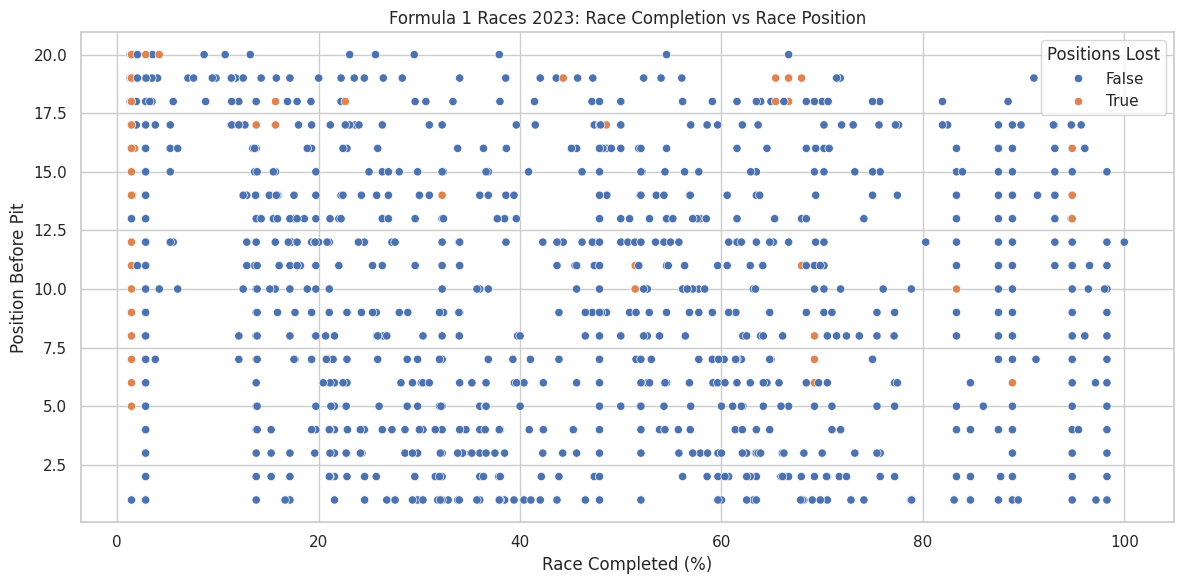

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops23, color="blue")
plt.title("Formula 1 Races 2023: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

Interesting to see if we limit this by people who are in for points (top 10)

In [26]:
# Create a fn which can takes each race and add more relevent pit stops information into the same df.
def getPitStopsDfWithCSVTop10(year, version):
  dfCalender = pd.read_csv(f'drive/MyDrive/prbx_data/{version}_data/{year}/eventCalender{year}.csv')
  # Store all pit stop info.
  pitstopDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

  for _, row in dfCalender.iterrows():
    if row['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'drive/MyDrive/prbx_data/{version}_data/{year}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}_Race.csv')

      # If they have not got into pits, stop has not taken place.
      race_laps_with_pit_stop = raceDf[~raceDf['PitInTime'].isnull()]

      maxLaps = raceDf['LapNumber'].max()

      for index, row in race_laps_with_pit_stop.iterrows():
        if row['Position'] >= 11:
          continue

        # Race completion (over laps)
        # Whether they had a position change
        race_completed = row['LapNumber'] / maxLaps * 100
        try:
          position_lost = row['Position'] > raceDf[
                (raceDf['LapNumber'] == row['LapNumber'] + 1) &
                (raceDf['Driver'] == row['Driver'])]['Position'].iloc[0]
        except:
        # In the event they pit on the last lap, means that they don't finish the race.
          pass

        new_row = {
              "Race Completed": race_completed,
              "Positions Lost": position_lost,
              "Position Before Pit": row['Position']
          }

        # Append the new row to the DataFrame
        pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)

  return pitstopDf

pitstops23 = getPitStopsDfWithCSVTop10(2023, 'v1')

<ipython-input-26-59112034fe1a>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)


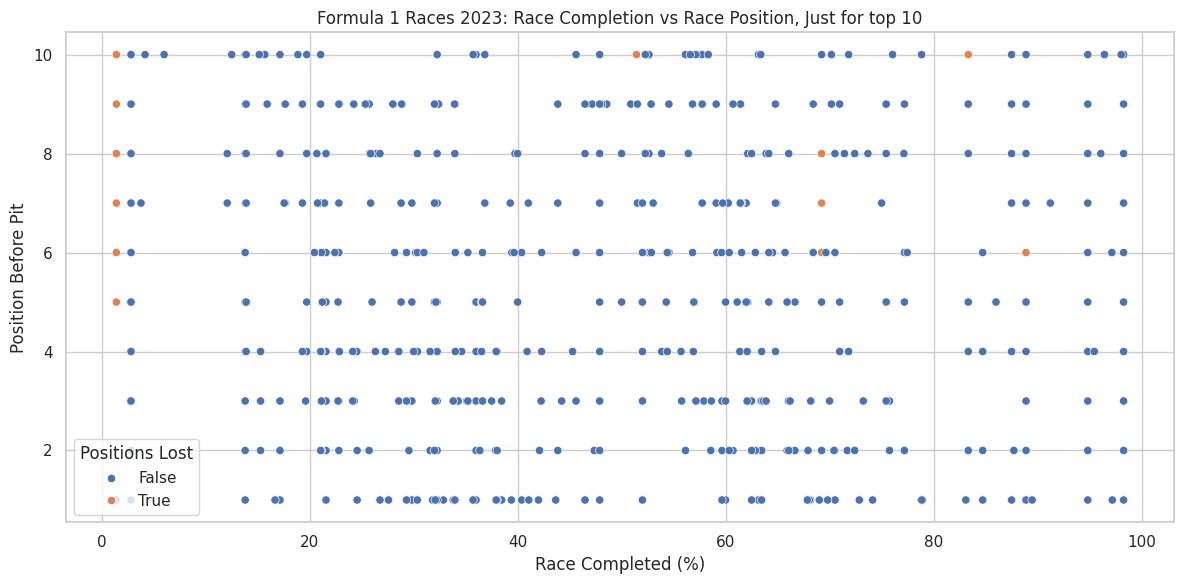

In [27]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops23, color="blue")
plt.title("Formula 1 Races 2023: Race Completion vs Race Position, Just for top 10")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
pitstops23

,Positions Lost,Race Completed,Position Before Pit
0,False,24.561404,1.0
1,False,63.157895,1.0
2,False,70.175439,10.0
3,False,29.824561,1.0
4,False,59.649123,2.0
...,...,...,...
484,False,37.931034,4.0
485,False,72.413793,8.0
486,False,25.862069,8.0
487,False,29.310345,6.0


In [32]:
pitstops23['Race Completed'].describe()

,Race Completed
count,489.000000
mean,46.533462
std,25.912633
min,1.408451
25%,25.757576
50%,45.614035
75%,64.912281
max,98.275862


In [37]:
pitstops23[pitstops23['Positions Lost'] == False]['Race Completed'].describe()

,Race Completed
count,476.000000
mean,46.851420
std,25.530966
min,1.408451
25%,26.236842
50%,45.614035
75%,64.788732
max,98.275862


Is Linear tire deg suitable - look at past data model.

- Plot two driver over a season - take the worse and the best.
- One street circuit and one normal - Baku and Sliverstone

1st that season - Verstappen
20th that season - K Mag (De Vries and Lawson below - didn't do a full season)

In [66]:
baku2023 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1_data/2023/4_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2023/4_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2023_Race.csv')
sliverstone2023 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1_data/2023/10_FORMULA_1_ARAMCO_BRITISH_GRAND_PRIX_2023/10_FORMULA_1_ARAMCO_BRITISH_GRAND_PRIX_2023_Race.csv')

baku2023['ConvertedLapTime'] = baku2023['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())
sliverstone2023['ConvertedLapTime'] = sliverstone2023['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())

In [69]:
baku2023

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,ConvertedLapTime
0,0 days 01:04:52.482000,VER,1,0 days 00:01:50.456000,1.0,1.0,NaN,NaN,NaN,0 days 00:00:43.217000,...,Red Bull Racing,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,2.0,False,NaN,False,False,110.456
1,0 days 01:06:40.189000,VER,1,0 days 00:01:47.707000,2.0,1.0,NaN,NaN,0 days 00:00:38.431000,0 days 00:00:43.642000,...,Red Bull Racing,0 days 01:04:52.482000,2023-04-30 11:05:53.952,1,2.0,False,NaN,False,True,107.707
2,0 days 01:08:27.866000,VER,1,0 days 00:01:47.677000,3.0,1.0,NaN,NaN,0 days 00:00:38.493000,0 days 00:00:43.718000,...,Red Bull Racing,0 days 01:06:40.189000,2023-04-30 11:07:41.659,1,1.0,False,NaN,False,True,107.677
3,0 days 01:10:14.974000,VER,1,0 days 00:01:47.108000,4.0,1.0,NaN,NaN,0 days 00:00:37.933000,0 days 00:00:43.372000,...,Red Bull Racing,0 days 01:08:27.866000,2023-04-30 11:09:29.336,1,1.0,False,NaN,False,True,107.108
4,0 days 01:12:02.450000,VER,1,0 days 00:01:47.476000,5.0,1.0,NaN,NaN,0 days 00:00:38.284000,0 days 00:00:43.414000,...,Red Bull Racing,0 days 01:10:14.974000,2023-04-30 11:11:16.444,1,1.0,False,NaN,False,True,107.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0 days 02:30:05.748000,PIA,81,0 days 00:01:47.158000,47.0,2.0,NaN,NaN,0 days 00:00:38.037000,0 days 00:00:44.059000,...,McLaren,0 days 02:28:18.590000,2023-04-30 12:29:20.060,1,13.0,False,NaN,False,True,107.158
958,0 days 02:31:52.808000,PIA,81,0 days 00:01:47.060000,48.0,2.0,NaN,NaN,0 days 00:00:38.303000,0 days 00:00:43.356000,...,McLaren,0 days 02:30:05.748000,2023-04-30 12:31:07.218,12,12.0,False,NaN,False,True,107.060
959,0 days 02:33:39.238000,PIA,81,0 days 00:01:46.430000,49.0,2.0,NaN,NaN,0 days 00:00:38.004000,0 days 00:00:42.996000,...,McLaren,0 days 02:31:52.808000,2023-04-30 12:32:54.278,1,12.0,False,NaN,False,True,106.430
960,0 days 02:35:25.351000,PIA,81,0 days 00:01:46.113000,50.0,2.0,NaN,NaN,0 days 00:00:37.633000,0 days 00:00:43.080000,...,McLaren,0 days 02:33:39.238000,2023-04-30 12:34:40.708,1,12.0,False,NaN,False,True,106.113


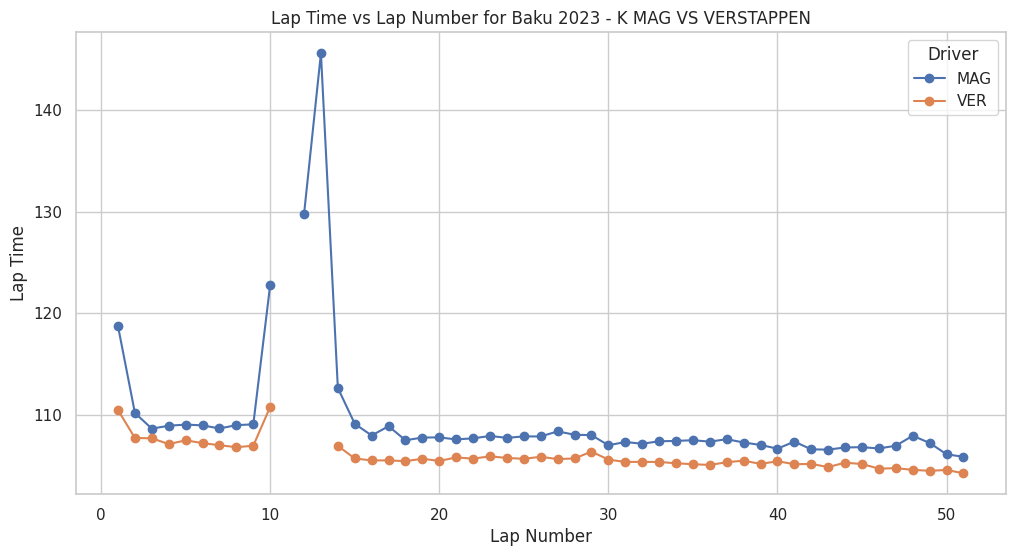

In [68]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in baku2023.groupby('Driver'):
    if driver == 'MAG' or driver == 'VER':
      plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Baku 2023 - K MAG VS VERSTAPPEN')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

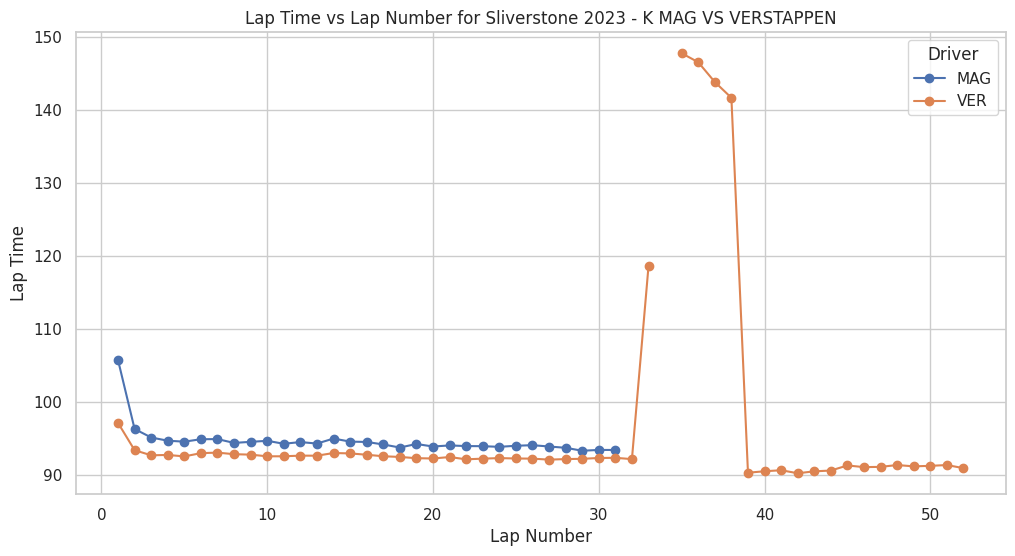

In [74]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023.groupby('Driver'):
    if driver == 'MAG' or driver == 'VER':
      plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Sliverstone 2023 - K MAG VS VERSTAPPEN')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

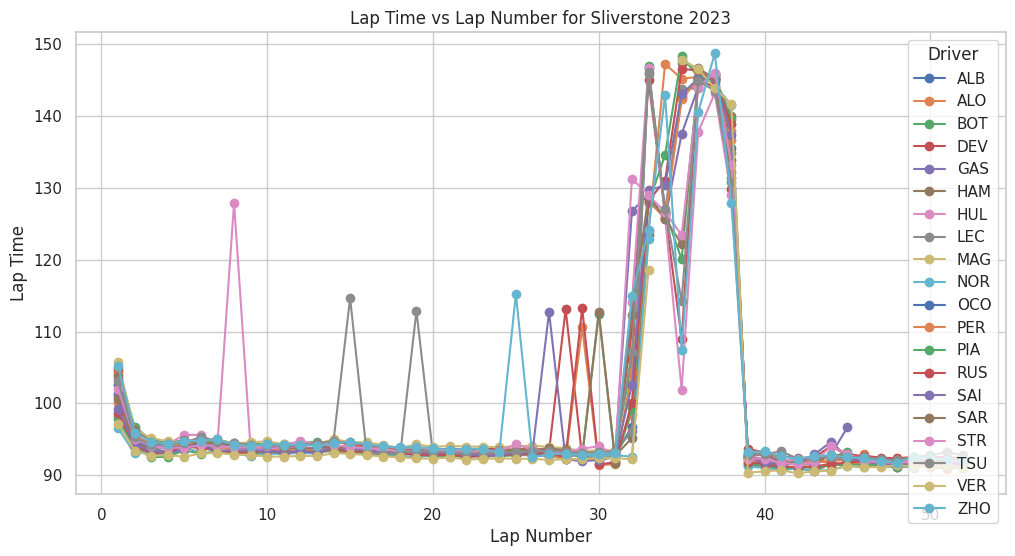

In [75]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023.groupby('Driver'):
    plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Sliverstone 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

* Some sort of random decrease, it is not exactly linear.
* Would it be better to plot time difference in this scenerio.